In [65]:
from __future__ import absolute_import, division, print_function, unicode_literals

import os

# os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
 
# # The GPU id to use, usually either "0" or "1";
# os.environ["CUDA_VISIBLE_DEVICES"]="0";

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.15.0


In [66]:
from keras.backend.tensorflow_backend import set_session
import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True  # dynamically grow the memory used on the GPU
config.log_device_placement = True  # to log device placement (on which device the operation ran)
sess = tf.compat.v1.Session(config=config)
set_session(sess)  # set this TensorFlow session as the default session for Keras

Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:1 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:2 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:3 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:05:00.0, compute capability: 6.1
/job:localhost/replica:0/task:0/device:GPU:1 -> device: 1, name: GeForce GTX 1080 Ti, pci bus id: 0000:06:00.0, compute capability: 6.1
/job:localhost/replica:0/task:0/device:GPU:2 -> device: 2, name: GeForce GTX 1080 Ti, pci bus id: 0000:09:00.0, compute capability: 6.1
/job:localhost/replica:0/task:0/device:GPU:3 -> device: 3, name: GeForce GTX 1080 Ti, pci bus id: 0000:0a:00.0, compute capability: 6.1



In [67]:
# fashion_mnist = keras.datasets.fashion_mnist
# (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# the data, split between train and test sets
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# input image dimensions
img_rows, img_cols = 28, 28

In [68]:
test_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [69]:
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']

In [70]:
train_images.shape

(60000, 28, 28)

In [71]:
len(train_labels)

60000

In [72]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [73]:
test_images.shape

(10000, 28, 28)

In [74]:
len(test_labels)

10000

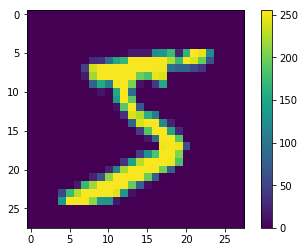

In [75]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [76]:
train_images = train_images / 255.0
test_images = test_images / 255.0

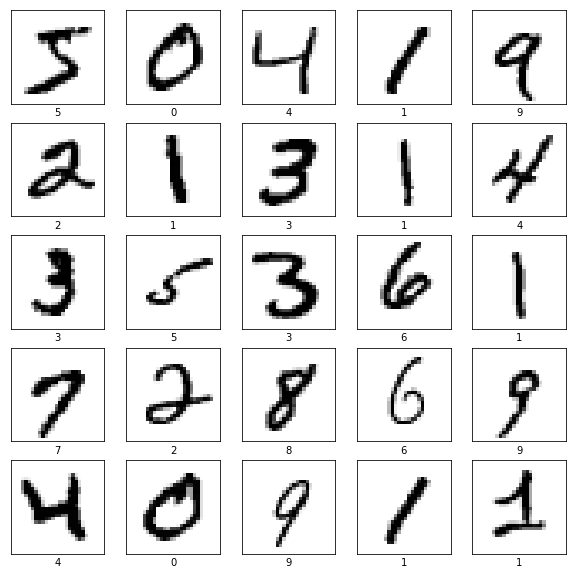

In [77]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [78]:
model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28,28)),
        keras.layers.Dense(100, activation=tf.nn.sigmoid),
        keras.layers.Dense(100, activation=tf.nn.sigmoid),
        keras.layers.Dense(100, activation=tf.nn.sigmoid),
        keras.layers.Dense(100, activation=tf.nn.sigmoid),
        keras.layers.Dense(100, activation=tf.nn.sigmoid),
        keras.layers.Dense(100, activation=tf.nn.sigmoid),
        keras.layers.Dense(100, activation=tf.nn.sigmoid),
#         keras.layers.Dense(100, activation=tf.nn.sigmoid),
#         keras.layers.Dense(100, activation=tf.nn.sigmoid),
#         keras.layers.Dense(100, activation=tf.nn.sigmoid),
#         keras.layers.Dense(100, activation=tf.nn.tanh),
#         keras.layers.Dense(100, activation=tf.nn.tanh),
#         keras.layers.Dense(100, activation=tf.nn.tanh),
#         keras.layers.Dense(100, activation=tf.nn.tanh),
#         keras.layers.Dense(100, activation=tf.nn.tanh),
        keras.layers.Dense(100, activation=tf.nn.softmax)
    ])

In [79]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [80]:
model.fit(train_images, train_labels, batch_size=128, epochs=20)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 97us/sample - loss: 2.3771 - acc: 0.1079
Epoch 2/20
60000/60000 [==============================] - 6s 93us/sample - loss: 1.7735 - acc: 0.2342
Epoch 3/20
60000/60000 [==============================] - 6s 97us/sample - loss: 1.2437 - acc: 0.4497
Epoch 4/20
60000/60000 [==============================] - 5s 89us/sample - loss: 0.8757 - acc: 0.6313
Epoch 5/20
60000/60000 [==============================] - 5s 91us/sample - loss: 0.4379 - acc: 0.8855
Epoch 6/20
60000/60000 [==============================] - 8s 126us/sample - loss: 0.3279 - acc: 0.9154
Epoch 7/20
60000/60000 [==============================] - 8s 127us/sample - loss: 0.2733 - acc: 0.9303
Epoch 8/20
60000/60000 [==============================] - 8s 129us/sample - loss: 0.2365 - acc: 0.9402
Epoch 9/20
60000/60000 [==============================] - 8s 127us/sample - loss: 0.2043 - acc: 0.9485
Epoch 10/20
60000/60000 [==============================

In [81]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 2s 200us/sample - loss: 0.1840 - acc: 0.9566
Test accuracy: 0.9566


## Make predictions

In [82]:
predictions = model.predict(test_images)

In [83]:
predictions[0]

array([8.8755797e-08, 1.6709436e-04, 1.8201517e-04, 2.0551037e-04,
       1.1838859e-04, 8.6448409e-07, 4.5787479e-07, 9.9873441e-01,
       5.5777615e-05, 5.3287524e-04, 4.0972278e-08, 9.6320312e-09,
       2.9291900e-08, 2.3403214e-08, 1.9223657e-08, 1.9430015e-08,
       2.3872264e-08, 3.6217060e-08, 5.2410638e-08, 2.3317931e-08,
       3.7362152e-08, 1.8904084e-08, 1.4560128e-08, 1.7708853e-08,
       6.6690369e-09, 4.9685699e-08, 2.0964263e-08, 4.7862081e-08,
       4.6019210e-08, 4.2456868e-08, 4.8457309e-08, 8.4788958e-09,
       4.3170566e-08, 5.6722396e-08, 3.1163406e-08, 4.6536098e-08,
       1.9551356e-08, 1.9886460e-08, 4.4400654e-08, 3.3796535e-08,
       4.7756121e-08, 3.4614828e-08, 2.4695627e-08, 2.4767186e-08,
       2.7712815e-08, 1.3816419e-08, 3.0554240e-08, 1.7291173e-08,
       1.8308492e-08, 2.7920263e-08, 3.4312322e-08, 2.2656751e-08,
       3.4276546e-08, 2.0437421e-08, 1.5392470e-08, 2.2776121e-08,
       1.9349208e-08, 2.5510136e-08, 3.0117910e-08, 1.0646648e

In [84]:
np.argmax(predictions[0])

7

In [85]:
test_labels[0]

7

In [86]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    predictions_array = predictions_array/ np.sum(predictions_array)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    predictions_array = predictions_array/ np.sum(predictions_array)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

In [87]:
# serialize model to JSON
model_json = model.to_json()
with open("model/model_MNIST_FC7_100_sigmoid.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model/model_MNIST_FC7_100_sigmoid.h5")
print("Saved model to disk")

Saved model to disk


In [88]:
weights = []
for layer in model.layers:
    weights.append(layer.get_weights()) # list of numpy arrays